In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,id,date,time,temp,humidity,pressure,light_intensity
0,0,1,05/08/2022,17:49:11,29.7,72,695.26,210.00
1,1,2,05/08/2022,17:49:45,29.7,73,695.26,185.00
2,2,3,05/08/2022,17:49:55,29.7,73,694.96,195.83
3,3,4,05/08/2022,17:50:05,29.8,73,694.96,110.00
4,4,5,05/08/2022,17:50:16,29.7,73,694.96,193.33


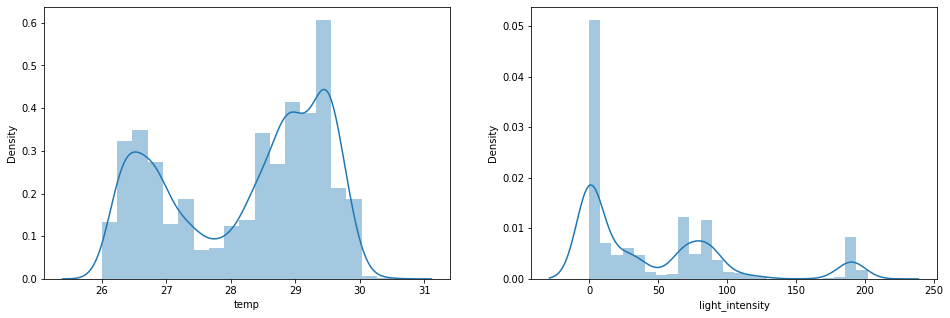

In [5]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['temp'])
plt.subplot(1,2,2)
sns.distplot(df['light_intensity'])
plt.show()

In [8]:
print("Highest allowed",df['light_intensity'].mean() + 3*df['light_intensity'].std())
print("Lowest allowed",df['light_intensity'].mean() - 3*df['light_intensity'].std())

Highest allowed 215.70777778354886
Lowest allowed -123.7915010079006


In [15]:
df[(df['light_intensity'] > 190) | (df['light_intensity'] < 0)]

,Unnamed: 0,id,date,time,temp,humidity,pressure,light_intensity
0,0,1,05/08/2022,17:49:11,29.7,72,695.26,210.00
2,2,3,05/08/2022,17:49:55,29.7,73,694.96,195.83
4,4,5,05/08/2022,17:50:16,29.7,73,694.96,193.33
5,5,6,05/08/2022,17:50:26,29.8,73,694.96,192.50
6,6,7,05/08/2022,17:50:36,29.7,73,694.78,195.00
...,...,...,...,...,...,...,...,...
424,424,425,05/08/2022,19:03:14,29.5,74,692.59,190.83
430,430,431,05/08/2022,19:04:16,29.5,74,692.55,190.83
433,433,434,05/08/2022,19:04:47,29.5,74,692.50,190.83
437,437,438,05/08/2022,19:05:28,29.5,74,692.59,190.83


In [17]:
new_df = df[(df['light_intensity'] < 190) | (df['light_intensity'] > 0)]
new_df

,Unnamed: 0,id,date,time,temp,humidity,pressure,light_intensity
0,0,1,05/08/2022,17:49:11,29.7,72,695.26,210.00
1,1,2,05/08/2022,17:49:45,29.7,73,695.26,185.00
2,2,3,05/08/2022,17:49:55,29.7,73,694.96,195.83
3,3,4,05/08/2022,17:50:05,29.8,73,694.96,110.00
4,4,5,05/08/2022,17:50:16,29.7,73,694.96,193.33
...,...,...,...,...,...,...,...,...
7091,7091,7092,06/08/2022,15:30:04,29.5,75,692.85,0.83
7092,7092,7093,06/08/2022,15:30:15,29.5,75,692.90,0.83
7093,7093,7094,06/08/2022,15:30:25,29.5,75,692.85,0.83
7094,7094,7095,06/08/2022,15:30:37,29.5,75,692.81,0.83


In [ ]:
new_df


<AxesSubplot:xlabel='time'>

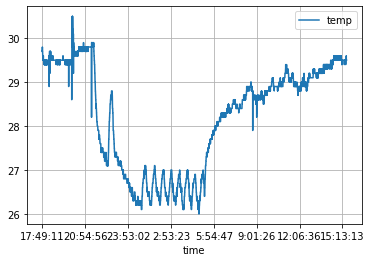

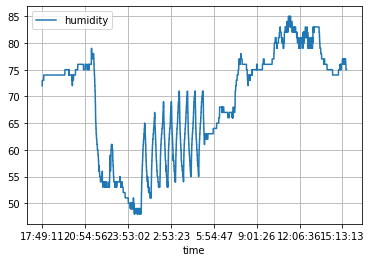

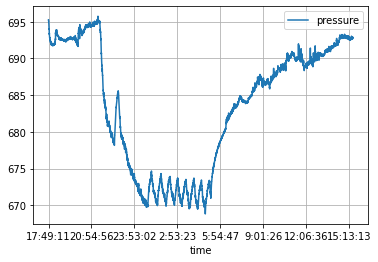

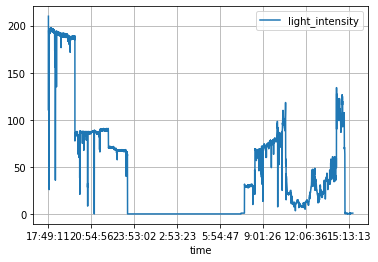

In [18]:
new_df['date']= pd.to_datetime(df['date']).dt.date
new_df.set_index(df['date'],inplace=True)
new_df.drop('date',axis=1,inplace=True)
new_df.plot(grid = 'on', x= "time",y ='temp',kind='line')
new_df.plot(grid = 'on',x= "time",y ='humidity')
new_df.plot(grid = 'on',x= "time",y ='pressure')
new_df.plot(grid = 'on',x= "time",y ='light_intensity')